#Robert Miller
#I pledge my honor that I have abided by the Stevens Honor System

#Unsupervised Learning

In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [68]:
df = pd.read_csv('autompg.csv')
#row 32 and 126 have no stated HorsePower,so I am going to fill it in with the mean.
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
#cylinders and model-year are already ordinal, so no processing is needed
# print(np.percentile(df['horsepower'],0.25))
# print(np.percentile(df['horsepower'],0.5))
# print(np.quantile(df['horsepower'],0.75))
df['mpg'] = df['mpg'].map(lambda x: 0 if x < 19 else 1 if x < 26.6 else 2)
df['displacement'] = df['displacement'].map(lambda x: 1 if x < 104.25 else 2 if x < 148.5 else 3 if x < 262 else 4)
df['weight'] = df['weight'].map(lambda x: 1 if x < 2223.75 else 2 if x < 2803.5 else 3 if x < 3608 else 4)
df['acceleration'] = df['acceleration'].map(lambda x: 1 if x < 13.825 else 2 if x < 15.5 else 3 if x < 17.175 else 4)
df['horsepower'] = df['horsepower'].map(lambda x: 1 if x < 46 else 2 if x < 47.97 else 3 if x < 125 else 4)
y = df['mpg'] #Target
df = df.drop(columns = 'mpg')
print(df)

     cylinders  displacement  horsepower  weight  acceleration  model-year
0            8             4           4       3             1          70
1            8             4           4       4             1          70
2            8             4           4       3             1          70
3            8             4           4       3             1          70
4            8             4           4       3             1          70
..         ...           ...         ...     ...           ...         ...
393          4             2           3       2             3          82
394          4             1           3       1             4          82
395          4             2           3       2             1          82
396          4             2           3       2             4          82
397          4             2           3       2             4          82

[398 rows x 6 columns]


In [69]:
 #Implement myKMean
def myKmean(X, k, iter):
  #This is completely unnecessary for the homework code, but I want to include it just for completeness.
  if k == 0 or k == 1:
    print('You must have at least 2 clusters')
    return -1
  #First, assign a label randomly
  X['labels'] = np.random.randint(k,size = len(X))
  #Next, initialize the Centroids for each observation
  centroids = []
  #We want DISTINCT Choices, so to prevent duplicates I'm adding a list that contains already chosen indicies
  for i in range(k):
    X_current = (X[X['labels'] == i])
    X_current = X_current.drop(columns = 'labels') #WE DONT NEED THESE AFTER ASSIGNING SINCE WE DID THIS FOR INITIALIZATION
    centroids.append(np.mean(X_current, axis = 0))
 #repeat the next steps -  assign each observation to the cluster whos centroid is closer, then compute the cluster's new centroid
  #This is the reverse of the algorithm in the slides, however since I randomly assigned the clusters already we are actually on step 2
  #calculate the distance now,
  for t in range(iter):
    labels = []
    X = X.drop(columns = 'labels')
    for i in range(len(X)):
      min_i = 0 #keep track of the index for the label
      min = abs(np.linalg.norm(centroids[0] - X.loc[i]))
      for j in range(len(centroids)):
        distance = abs(np.linalg.norm(centroids[j] - X.loc[i]))
        if distance < min:
          min_i = j
          min = distance
      labels.append(min_i)
    X['labels'] = labels
    #This labels the observation to the closest cluster
    new_centroids = []
    for n in range(k):
      X_current = (X[X['labels'] == n])
      X_current = X_current.drop(columns = 'labels')
      new_centroids.append((np.mean(X_current, axis = 0)))
    check = True
    for p in range(len(new_centroids)):
      if not new_centroids[p].equals(centroids[p]):
        check = False
    if check:
      break
    centroids = new_centroids
  #Calculate the Variance here
  variances_agg = 0
  for v in range(k):
    CK = X[X['labels'] == n]
    if len(CK) == 0:
       continue
    variances_agg = variances_agg + ((1/len(CK)) *abs(np.sum(CK - centroids[v])))
  total_variance = variances_agg / len(X)
  return X, total_variance

In [70]:
test_run, variance = myKmean(df, 3, 100)
print(test_run)
print(variance)
df = df.drop(columns='labels')
test_run, variance = myKmean(df, 4, 100)
print(variance)
df = df.drop(columns='labels')
test_run, variance = myKmean(df, 5, 100)
print(variance)
df = df.drop(columns='labels')
test_run, variance = myKmean(df, 6, 100)
print(variance)
df = df.drop(columns='labels')
test_run, variance = myKmean(df, 8, 100)
print(variance)
df = df.drop(columns='labels')
test_run, variance = myKmean(df, 10, 100)
print(variance)
df = df.drop(columns='labels')
test_run, variance = myKmean(df, 15, 100)
print(variance)
df = df.drop(columns='labels')

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


     cylinders  displacement  horsepower  weight  acceleration  model-year  \
0            8             4           4       3             1          70   
1            8             4           4       4             1          70   
2            8             4           4       3             1          70   
3            8             4           4       3             1          70   
4            8             4           4       3             1          70   
..         ...           ...         ...     ...           ...         ...   
393          4             2           3       2             3          82   
394          4             1           3       1             4          82   
395          4             2           3       2             1          82   
396          4             2           3       2             4          82   
397          4             2           3       2             4          82   

     labels  
0         0  
1         0  
2         0  
3      

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


acceleration    0.009627
cylinders       0.019051
displacement    0.011513
horsepower      0.005174
labels          0.000000
model-year      0.037922
weight          0.010084
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


acceleration    0.007635
cylinders       0.019559
displacement    0.012826
horsepower      0.004526
labels          0.000000
model-year      0.045639
weight          0.012059
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


acceleration    0.017241
cylinders       0.031888
displacement    0.019187
horsepower      0.008910
labels          0.000000
model-year      0.061430
weight          0.017076
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


acceleration    0.007442
cylinders       0.022660
displacement    0.014555
horsepower      0.004443
labels          0.000000
model-year      0.059664
weight          0.013837
dtype: float64
0.0
acceleration    0.009918
cylinders       0.026954
displacement    0.017098
horsepower      0.004707
labels          0.000000
model-year      0.086396
weight          0.016239
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


#D.
(I am ignoring the labels variances, which are not being used as a metric but are still captured in how I calculated variance, so just ignore their inclusion its why its 0) The smallest variances across the board can be seen when k = 3, so I am going to select that as the best amount of clusters for this model. While I'd like to say that the total variance converges as k increases, which does happen, with higher values taking much more time k = 3 just works better for my purposes.

In [71]:
choose_3, variance = myKmean(df, 3, 100)
df = df.drop(columns = 'labels')
list_l = list(choose_3['labels'])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [72]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(df)
results = kmeans.fit_predict(X = df)
print(results)
print(list_l)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 2 2 2 2 2 1
 2 1 1 2 2 2 2 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,

In [ ]:
equal_count = 0
for i in range(len(list_l)):
  if(results[i] == 1 and list_l[i] == 2):
    equal_count += 1
  if(results[i] == 0 and list_l[i] == 1):
    equal_count += 1
  if(results[i] == 2 and list_l[i] == 0):
    equal_count += 1
print(equal_count)
print(kmeans.inertia_)

0
2777.570229190103


#F.
Something interesting is that the clustering, in this trial, leads to the same exact clustering as my implementation, something of note however is that on each run of either algorithm the clusters tend to change their label while still belonging to that area, as in the 2's may change to 1 but still will be classified the same way. From the weight values we can see that cylinders is correlated with acceleration, and year, and that acceleration is also correlated with displacement.

#1.2 Dimensionality Reduction

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df2= pd.read_csv('pca_data.csv')
print(df2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [ ]:
for col in df2.columns:
  df2.hist(column = col)
  plt.show()
for col in df2.columns:
  df2.boxplot(column = col)
  plt.show()

#b. What can be reduced?
based off of the visuals an dlooking into the data, here are my conclusions. Fixed and Volatile acidity can be combined, and if citric acid is the acid in question they can probably be removed. Acidity is already measured by pH, so I'm not sure what metric those columns would be desired for. Free and total sulfur dioxide can likely be reduced as well, it seems unlikely you need both of those columns as free sulfur dioxide may be able to be gleamed from the pH or another column. If sulphates are the residue of some chemical reaction, then residual sugar is not needed as a column, otherwise it can stay. I am not sure what 'quality' means as a column, so depending on the target prediction variable it can likely be removed.

In [59]:
from scipy import stats
from numpy.linalg import eig
def myPCA(X,n):
  # covariances = []
  #First do standardization
  for col in X.columns:
    if(X[col] == 0).any():
      X[col] = X[col] + 1
    X[col], lambdas= stats.boxcox(X[col])
  #Next calculate the covariance matrix (We can do this all at once in one line)
  covariances = (X.T @ X) / len(X)
  #Then get the eigenvalues of the covariances
  eValues, eVectors = eig(covariances)
  #Sort the eigenvalues and Eigenvectors,
  #I found an easy way to sort both by pairing them and sorting them that way
  ePairs = []
  for i in range(len(eValues)):
    ePairs.append([abs(eValues[i]), eVectors[i,:]])
  ePairs.sort(key=lambda x: x[0], reverse = True)
  for j in range(len(eValues)):
    eVectors[j] = ePairs[j][1]
    eValues[j] = ePairs[j][0]
  #Choose the components
  W = eVectors[:n]
  #Z = X(W.t)
  Z = np.dot(X, W.T)
  #To make comparison easier, I will convert this output to Explained Variance, though I see it is not in our PCA pseudo code
  eValuesTotal = sum(eValues)
  explainedVariance = []
  for i in eValues:
      explainedVariance.append((i/eValuesTotal))
  #Return the core features
  return Z, explainedVariance[:n] #I only want however many features expressed to be considered
test = df2.copy()
projections, explainedVariance= myPCA(test, 3)
print(projections)
print(explainedVariance)

[[ 2.80623072 -2.98799963  2.58244504]
 [ 3.20917768 -3.7300315   3.09120052]
 [ 3.02530095 -3.14126366  2.7968093 ]
 ...
 [ 2.72044585 -4.19104048  3.22139383]
 [ 2.83390519 -4.32572183  3.29742058]
 [ 2.75082484 -3.62002448  2.95060153]]
[0.9681905818475959, 0.019855836624205255, 0.005407359808271547]


In [55]:
from sklearn.decomposition import PCA

In [58]:
pca = PCA(n_components=3)
pca.fit(df2)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.94607951 0.04834835 0.00259599]
[1346.05255997  304.29093596   70.50984811]


#Comparison
We can see that my PCA function holds one component more responsible for the variance as opposed to the sklearn PCA function. Despite this, it seems that they both come to the same conclusion that 2 components cover ~98% of the variance.

#2. Bayes Networks

In [60]:
!pip3 install pgmpy
!pip3 install -q daft

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00


In [98]:
%matplotlib inline
import daft
from daft import PGM
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

In [99]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

<Axes: >

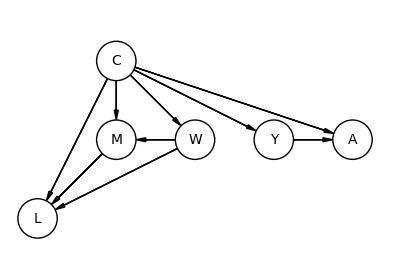

In [100]:
pgm = PGM(shape=[5, 3])

pgm.add_node(daft.Node('C', r"C", 2, 3))
pgm.add_node(daft.Node('Y', r"Y", 4, 2))
pgm.add_node(daft.Node('W', r"W", 3, 2))
pgm.add_node(daft.Node('M', r"M", 2, 2))
pgm.add_node(daft.Node('A', r"A", 5, 2))
pgm.add_node(daft.Node('L', r"L", 1, 1))


pgm.add_edge('C', 'Y')
pgm.add_edge('C', 'A')
pgm.add_edge('C', 'M')
pgm.add_edge('C', 'W')
pgm.add_edge('W', 'M')
pgm.add_edge('Y', 'A')
pgm.add_edge('C', 'L')
pgm.add_edge('W', 'L')
pgm.add_edge('M', 'L')

pgm.render()
# plt.show()

In [101]:
df.columns = ['C', 'D','H','W','A','Y']
df['M'] = y
df['L'] = results


ValueError: Length mismatch: Expected axis has 8 elements, new values have 6 elements

In [102]:
model = BayesianNetwork()
model.add_node('C', 'Y', 'A')
model.add_node('W', 'M', 'L')
model.add_edge('C', 'Y')
model.add_edge('C', 'A')
model.add_edge('C', 'M')
model.add_edge('C', 'W')
model.add_edge('W', 'M')
model.add_edge('Y', 'A')
##
model.add_edge('C', 'L')
model.add_edge('M', 'L')
model.add_edge('W', 'L')

model.fit(df)

In [103]:
model.check_model()

True

In [104]:
print(model.get_cpds('C'))
print(model.get_cpds('Y'))
print(model.get_cpds('A'))
print(model.get_cpds('W'))
print(model.get_cpds('M'))
print(model.get_cpds('L'))

+------+------------+
| C(3) | 0.0100503  |
+------+------------+
| C(4) | 0.512563   |
+------+------------+
| C(5) | 0.00753769 |
+------+------------+
| C(6) | 0.211055   |
+------+------------+
| C(8) | 0.258794   |
+------+------------+
+-------+------+----------------------+-----+----------------------+
| C     | C(3) | C(4)                 | ... | C(8)                 |
+-------+------+----------------------+-----+----------------------+
| Y(70) | 0.0  | 0.03431372549019608  | ... | 0.17475728155339806  |
+-------+------+----------------------+-----+----------------------+
| Y(71) | 0.0  | 0.06372549019607843  | ... | 0.06796116504854369  |
+-------+------+----------------------+-----+----------------------+
| Y(72) | 0.25 | 0.06862745098039216  | ... | 0.1262135922330097   |
+-------+------+----------------------+-----+----------------------+
| Y(73) | 0.25 | 0.05392156862745098  | ... | 0.1941747572815534   |
+-------+------+----------------------+-----+----------------------+

#B. Verify the Conditional Independencies in the Graph
Overall - Everything is dependent on C. C has a direct edge to every node in the graph, so therefore nothing is conditionally independent of C.
Y - Y is independent of all other nodes except for C. For nodes W,M, and L they are independent given C, and are blocked without C. For A, Y is not independent of A given C, as it directly influences A.
A - Same reasoning as Y for why it is independent of W,M, and L, however because Y directly influences it, it is not independent from Y.
W - Same reasoning again for independence from Y and A, however M and L are directly dependent on W so they will not be independent.
M - Given C Y and A are independent via C being a fork. W directly influences M, so it will never be independent from it, and M also directly influences L, so L will not be independent.
L - L is independent from Y and A for the same reasoning as M and W, however since there is a direct edge from C, M, and W to L it is dependent on those nodes.

In [105]:
model.local_independencies(['C','Y','A','W','M','L'])

(Y ⟂ W, M, L | C)
(A ⟂ W, M, L | Y, C)
(W ⟂ Y, A | C)
(M ⟂ Y, A | W, C)
(L ⟂ Y, A | M, C, W)

In [106]:
test = df.copy()
test = test.drop(['D', 'H'], axis = 1)
model.predict_probability(test.drop('L', axis = 1))

,L_0,L_1,L_2
0,0.000000,0.888889,0.111111
1,0.000000,0.894118,0.105882
2,0.000000,0.888889,0.111111
3,0.000000,0.888889,0.111111
4,0.000000,0.888889,0.111111
...,...,...,...
393,0.076923,0.000000,0.923077
394,0.325581,0.000000,0.674419
395,0.076923,0.000000,0.923077
396,0.076923,0.000000,0.923077


In [97]:
model.predict(test.drop('L', axis = 1))

  0%|          | 0/206 [00:00<?, ?it/s]

,L
0,1
1,1
2,1
3,1
4,1
...,...
393,2
394,2
395,2
396,2
